In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

# import the requirements

In [2]:
# to visualize all the columns in the dataframe
pd.pandas.set_option('display.max_columns',None)


# Read the CSV file 
data=pd.read_csv("C:\\Users\\Saransh Sehrawat\\My Projects\\Internship Credit Risk\\Training_Dataset\\Training_Batch_file_Raw.csv")

data.head()

,Unnamed: 0,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,4,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,1,1,1,1


In [3]:
data.drop(columns=["Unnamed: 0"],inplace=True)


data.describe().T


# Description About The Dataset (statistical summary of the dataframe or series): 

,count,mean,std,min,25%,50%,75%,max
status,800.0,2.64875,1.250931,1.0,1.75,2.0,4.00,4.0
duration,800.0,20.49625,12.006881,4.0,12.00,18.0,24.00,72.0
credit_history,800.0,2.58250,1.099866,0.0,2.00,2.0,4.00,4.0
purpose,800.0,2.78500,2.680533,0.0,1.00,2.0,3.00,10.0
amount,800.0,3210.29000,2792.840814,250.0,1364.00,2264.0,3907.25,18424.0
savings,800.0,2.14375,1.589416,1.0,1.00,1.0,3.00,5.0
employment_duration,800.0,3.39500,1.224070,1.0,3.00,3.0,5.00,5.0
installment_rate,800.0,2.95250,1.134395,1.0,2.00,3.0,4.00,4.0
personal_status_sex,800.0,2.68750,0.696743,1.0,2.00,3.0,3.00,4.0
other_debtors,800.0,1.14375,0.472615,1.0,1.00,1.0,1.00,3.0


In [4]:
### Check the categorical Features from the dataset
category_features=[]
thresold=10    # Those Features nunique values are less than 10 , consider as categorical features
for each in data.columns:
    if data[each].nunique()<= thresold:
        category_features.append(each)
        
for each in category_features:
    data[each]=data[each].astype("category")
    
print("Number of Categorical column from the dataframe:",len(category_features))
print("\n")
print("Category Features are: ", category_features)
print("\n")
print("Categorical:","\n",data.nunique()<=10)

Number of Categorical column from the dataframe: 18


Category Features are:  ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']


Categorical: 
 status                      True
duration                   False
credit_history              True
purpose                     True
amount                     False
savings                     True
employment_duration         True
installment_rate            True
personal_status_sex         True
other_debtors               True
present_residence           True
property                    True
age                        False
other_installment_plans     True
housing                     True
number_credits              True
job                         True
people_liable               True
telephone         

## Univariate Analysis:
**Univariate analysis is the technique of comparing and analyzing the dependency of a single predictor and a response variable. The prefix "uni" means one, emphasizing the fact that the analysis only accounts for one variable's effect on a dependent variable.**

In [5]:
def Cat_features(data):
    print("Unique data: ", data.unique(),"\n")
    print("Numberof unique data: ", data.nunique(),"\n")
    print("What are values of unique data:","\n", data.value_counts(),"\n")
    print(data.value_counts().plot(kind = 'bar'))

Unique data:  [1, 2, 4, 3]
Categories (4, int64): [1, 2, 3, 4] 

Numberof unique data:  4 

What are values of unique data: 
 4    334
2    215
1    200
3     51
Name: status, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


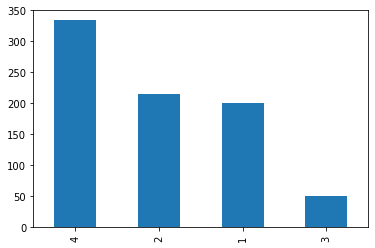

In [6]:
Cat_features(data["status"])

Unique data:  [4, 2, 3, 0, 1]
Categories (5, int64): [0, 1, 2, 3, 4] 

Numberof unique data:  5 

What are values of unique data: 
 2    408
4    250
3     70
1     40
0     32
Name: credit_history, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


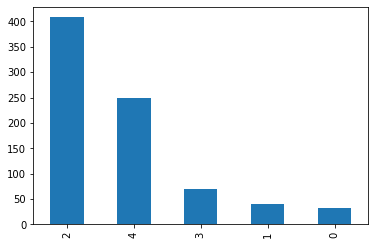

In [7]:
Cat_features(data["credit_history"])

Unique data:  [2, 0, 9, 3, 1, 10, 4, 5, 6, 8]
Categories (10, int64): [0, 1, 2, 3, ..., 6, 8, 9, 10] 

Numberof unique data:  10 

What are values of unique data: 
 3     227
0     185
2     144
1      86
9      68
6      44
5      21
10     10
8       8
4       7
Name: purpose, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


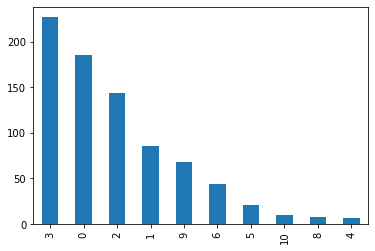

In [8]:
Cat_features(data["purpose"])

Unique data:  [1, 2, 3, 5, 4]
Categories (5, int64): [1, 2, 3, 4, 5] 

Numberof unique data:  5 

What are values of unique data: 
 1    470
5    149
2     86
3     52
4     43
Name: savings, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


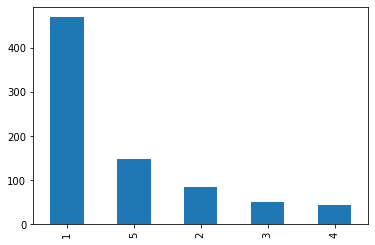

In [9]:
Cat_features(data["savings"])

Unique data:  [2, 3, 4, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5] 

Numberof unique data:  5 

What are values of unique data: 
 3    258
5    207
4    145
2    137
1     53
Name: employment_duration, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


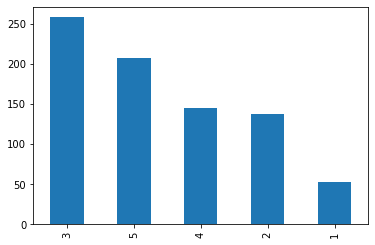

In [10]:
Cat_features(data["employment_duration"])

Unique data:  [4, 2, 3, 1]
Categories (4, int64): [1, 2, 3, 4] 

Numberof unique data:  4 

What are values of unique data: 
 4    379
2    183
3    121
1    117
Name: installment_rate, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


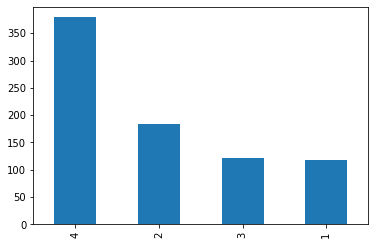

In [11]:
Cat_features(data["installment_rate"])

Unique data:  [2, 3, 4, 1]
Categories (4, int64): [1, 2, 3, 4] 

Numberof unique data:  4 

What are values of unique data: 
 3    448
2    244
4     70
1     38
Name: personal_status_sex, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


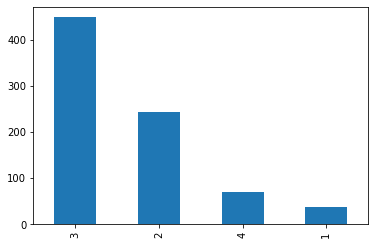

In [12]:
Cat_features(data["personal_status_sex"])

Unique data:  [1, 3, 2]
Categories (3, int64): [1, 2, 3] 

Numberof unique data:  3 

What are values of unique data: 
 1    725
3     40
2     35
Name: other_debtors, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


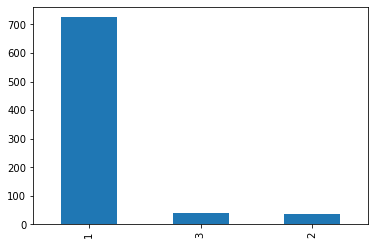

In [13]:
Cat_features(data["other_debtors"])

Unique data:  [4, 2, 3, 1]
Categories (4, int64): [1, 2, 3, 4] 

Numberof unique data:  4 

What are values of unique data: 
 4    322
2    254
3    120
1    104
Name: present_residence, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


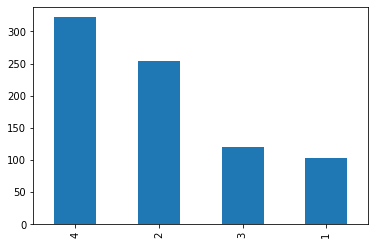

In [14]:
Cat_features(data["present_residence"])

Unique data:  [2, 1, 3, 4]
Categories (4, int64): [1, 2, 3, 4] 

Numberof unique data:  4 

What are values of unique data: 
 3    263
1    230
2    182
4    125
Name: property, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


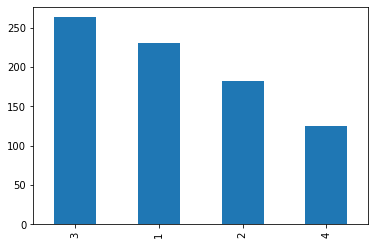

In [15]:
Cat_features(data["property"])

Unique data:  [3, 1, 2]
Categories (3, int64): [1, 2, 3] 

Numberof unique data:  3 

What are values of unique data: 
 3    652
1    113
2     35
Name: other_installment_plans, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


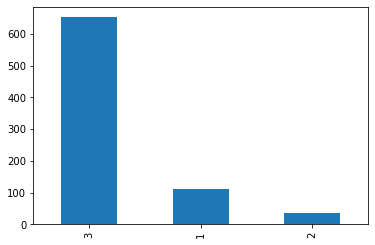

In [16]:
Cat_features(data["other_installment_plans"])

Unique data:  [1, 2, 3]
Categories (3, int64): [1, 2, 3] 

Numberof unique data:  3 

What are values of unique data: 
 2    575
1    136
3     89
Name: housing, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


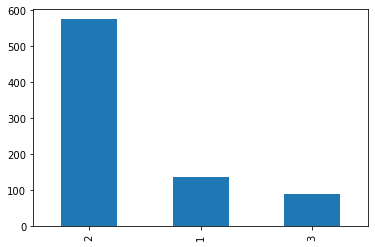

In [17]:
Cat_features(data["housing"])

Unique data:  [1, 2, 4, 3]
Categories (4, int64): [1, 2, 3, 4] 

Numberof unique data:  4 

What are values of unique data: 
 1    499
2    271
3     25
4      5
Name: number_credits, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


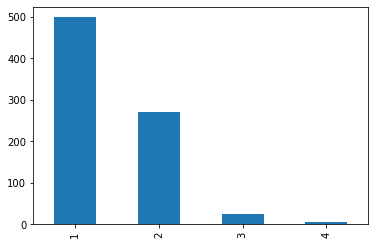

In [18]:
Cat_features(data["number_credits"])

Unique data:  [1, 0]
Categories (2, int64): [0, 1] 

Numberof unique data:  2 

What are values of unique data: 
 1    600
0    200
Name: credit_risk, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


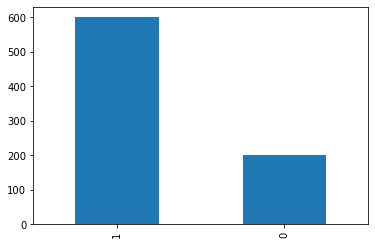

In [19]:
Cat_features(data["credit_risk"])

### imbalnce dataset

In [20]:
for i in data.columns:
    print(data[i].value_counts())

4    334
2    215
1    200
3     51
Name: status, dtype: int64
24    149
12    140
18     88
6      65
36     61
15     53
9      41
48     36
30     33
10     25
21     25
60     11
11      9
42      9
27      7
20      7
4       6
8       5
14      4
39      4
13      4
7       4
33      3
22      2
54      2
28      2
47      1
5       1
16      1
45      1
72      1
Name: duration, dtype: int64
2    408
4    250
3     70
1     40
0     32
Name: credit_history, dtype: int64
3     227
0     185
2     144
1      86
9      68
6      44
5      21
10     10
8       8
4       7
Name: purpose, dtype: int64
1262    3
1478    3
1258    3
1393    3
1743    2
       ..
2404    1
1554    1
1283    1
1747    1
6350    1
Name: amount, Length: 754, dtype: int64
1    470
5    149
2     86
3     52
4     43
Name: savings, dtype: int64
3    258
5    207
4    145
2    137
1     53
Name: employment_duration, dtype: int64
4    379
2    183
3    121
1    117
Name: installment_rate, dtype: int64
3    448


'Distribution of the dataset'

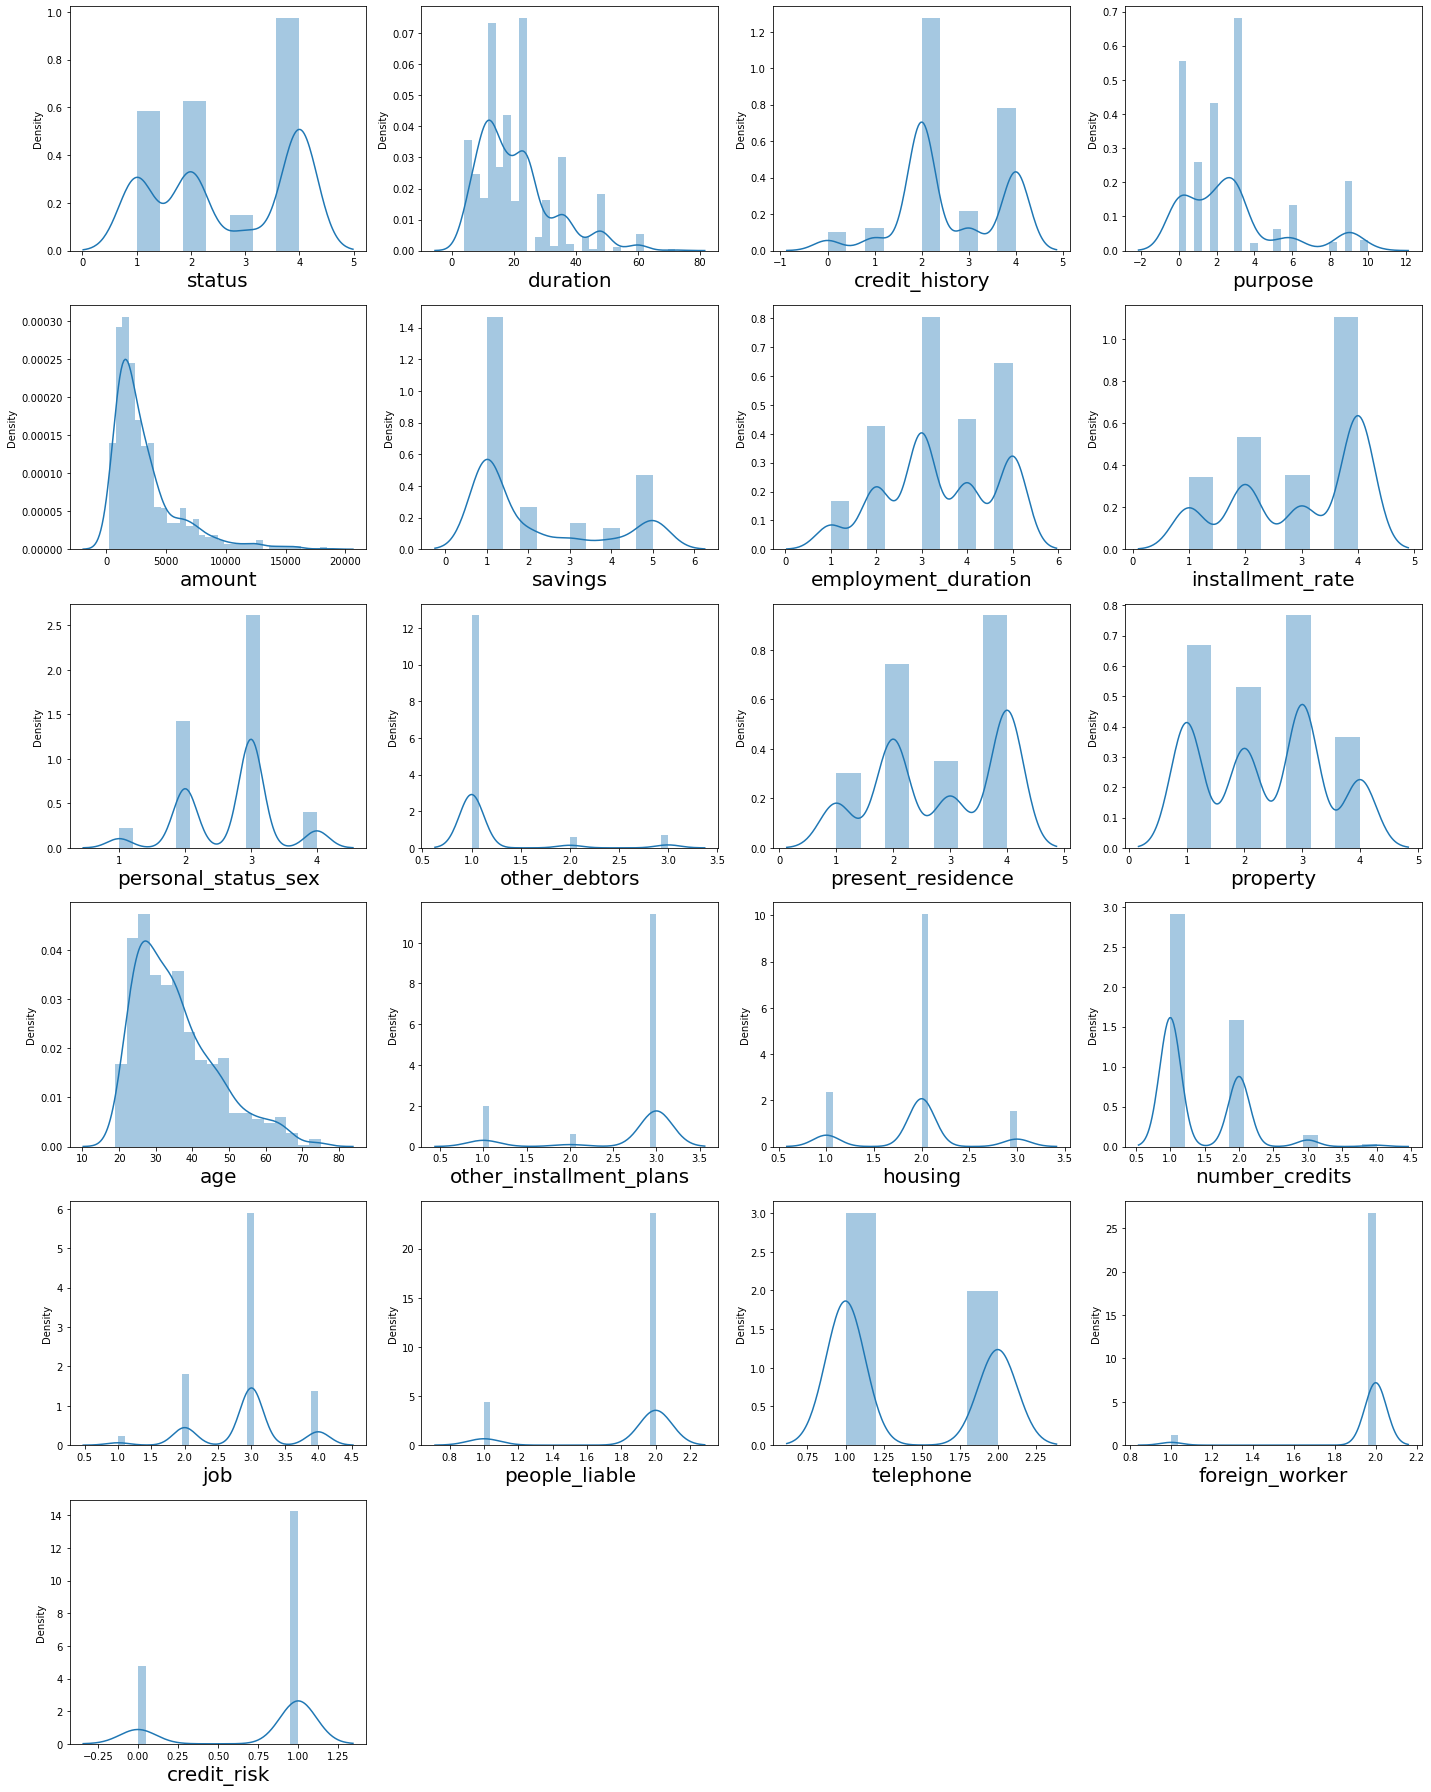

In [21]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=21 :
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

'''Distribution of the dataset'''

<AxesSubplot:xlabel='duration', ylabel='Frequency'>

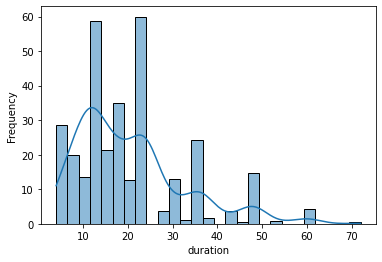

In [22]:
sns.histplot(data=data, x="duration",kde=True,stat="frequency")

<AxesSubplot:xlabel='amount', ylabel='Frequency'>

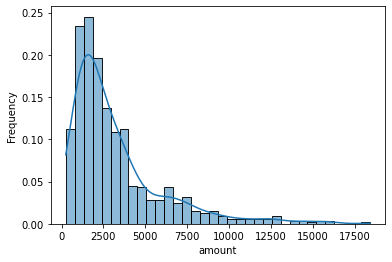

In [23]:
sns.histplot(data=data, x="amount",kde=True,stat="frequency")

<AxesSubplot:xlabel='age', ylabel='Frequency'>

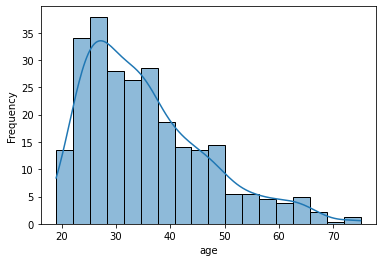

In [24]:
sns.histplot(data=data, x="age",kde=True,stat="frequency")

**Note: As comapre to the Histogram and Distribution the numerical columns are like age, amount and duration is quantitative features Which are shows right side skew, It also indicate thats there are large number of values are presnt in the data set is so far from the mean.So to reduce the skew using lognormal distribution to reduce the skewness.**

## Outlier Treatment



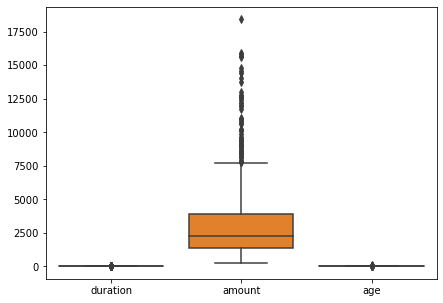

In [25]:
df=data[["duration","amount","age"]]
fig , ax = plt.subplots(figsize=(7,5))
sns.boxplot(data= df, ax = ax)
plt.show()


# Box plot for the numerical column to check the outliers

In [26]:
def numdata(data):
    plt.figure(figsize=(20,20))
    plt.subplot(3,2,1)
    sns.distplot(data,bins=30)
    
    plt.subplot(3,2,2)
    sns.boxplot(data)
    plt.tight_layout()
    
    plt.subplot(3,2,3)
    plt.hist(data)
    plt.show()
    
    
# Create a function for visualize the numerical column data Distribution.    

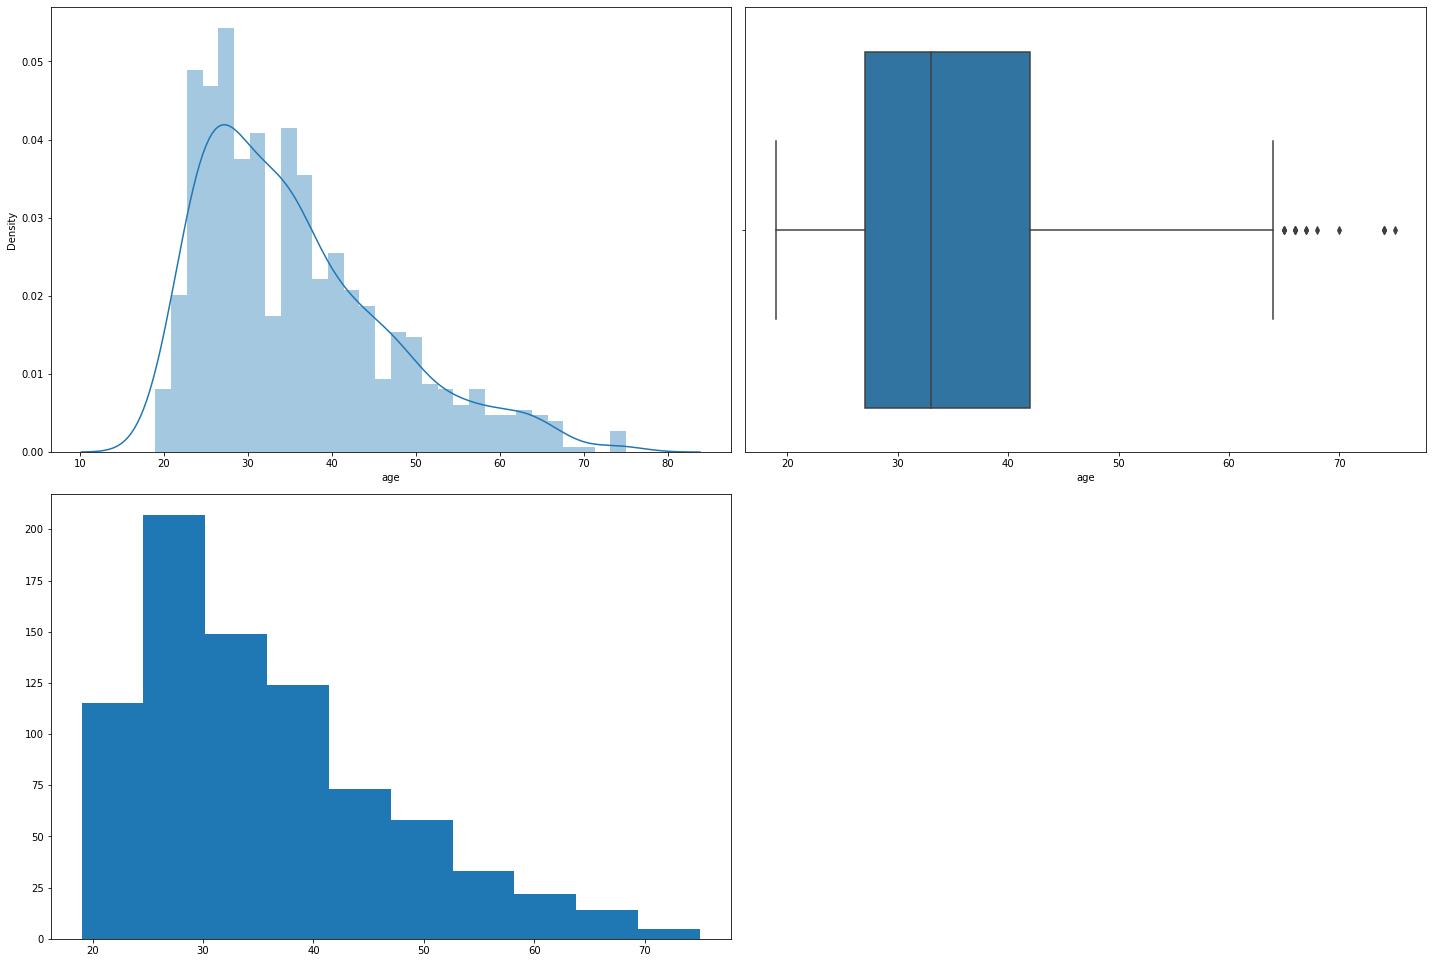

In [27]:
numdata(data["age"]) # For age Column

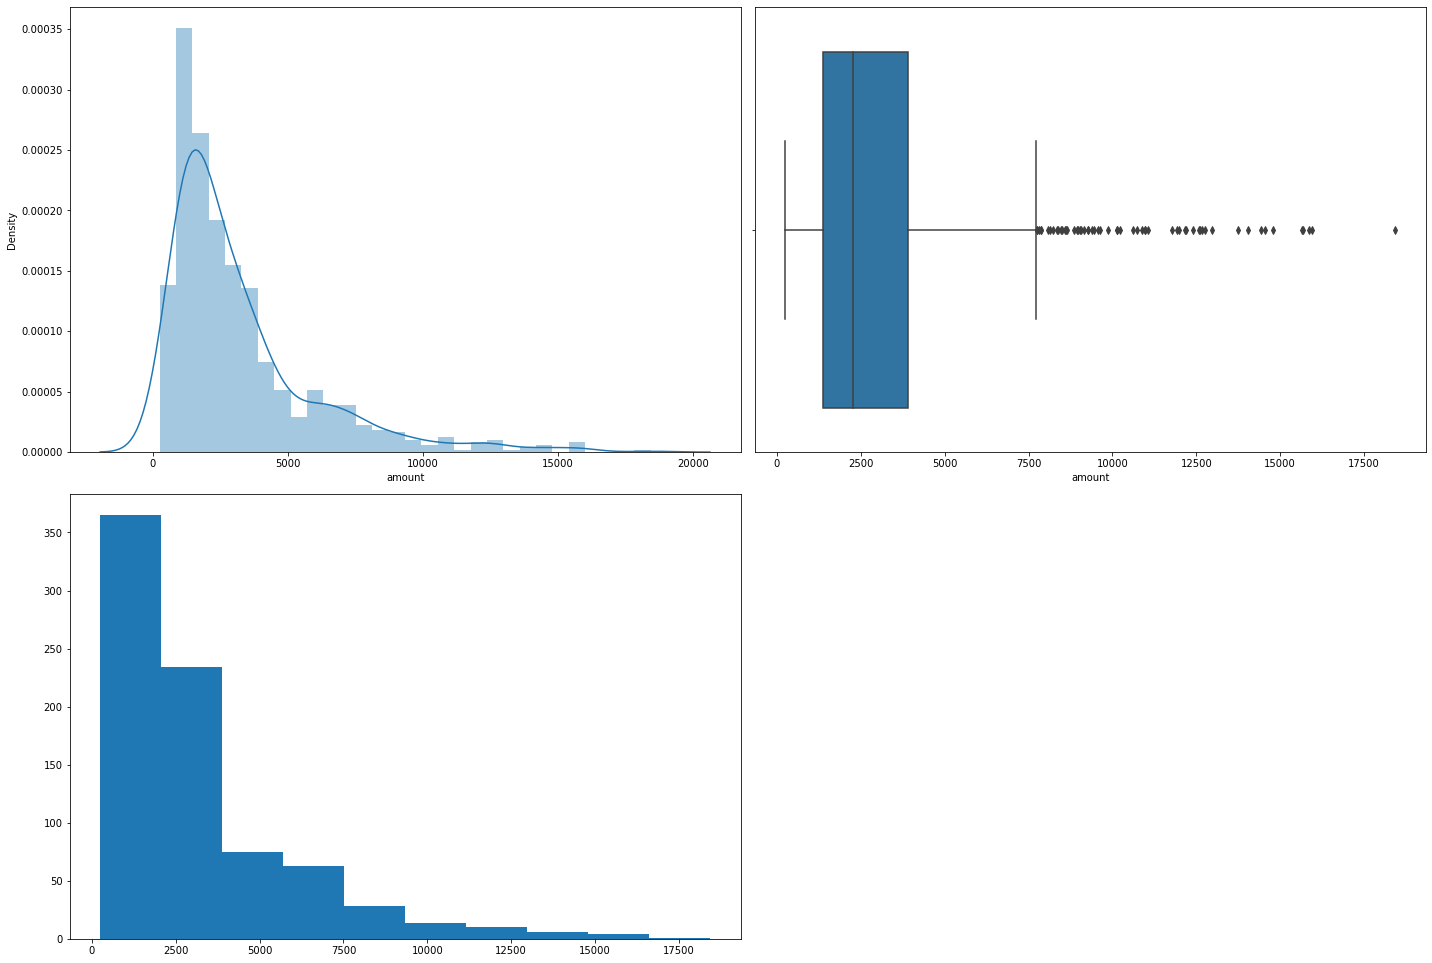

In [28]:
numdata(data["amount"]) # for amount Column

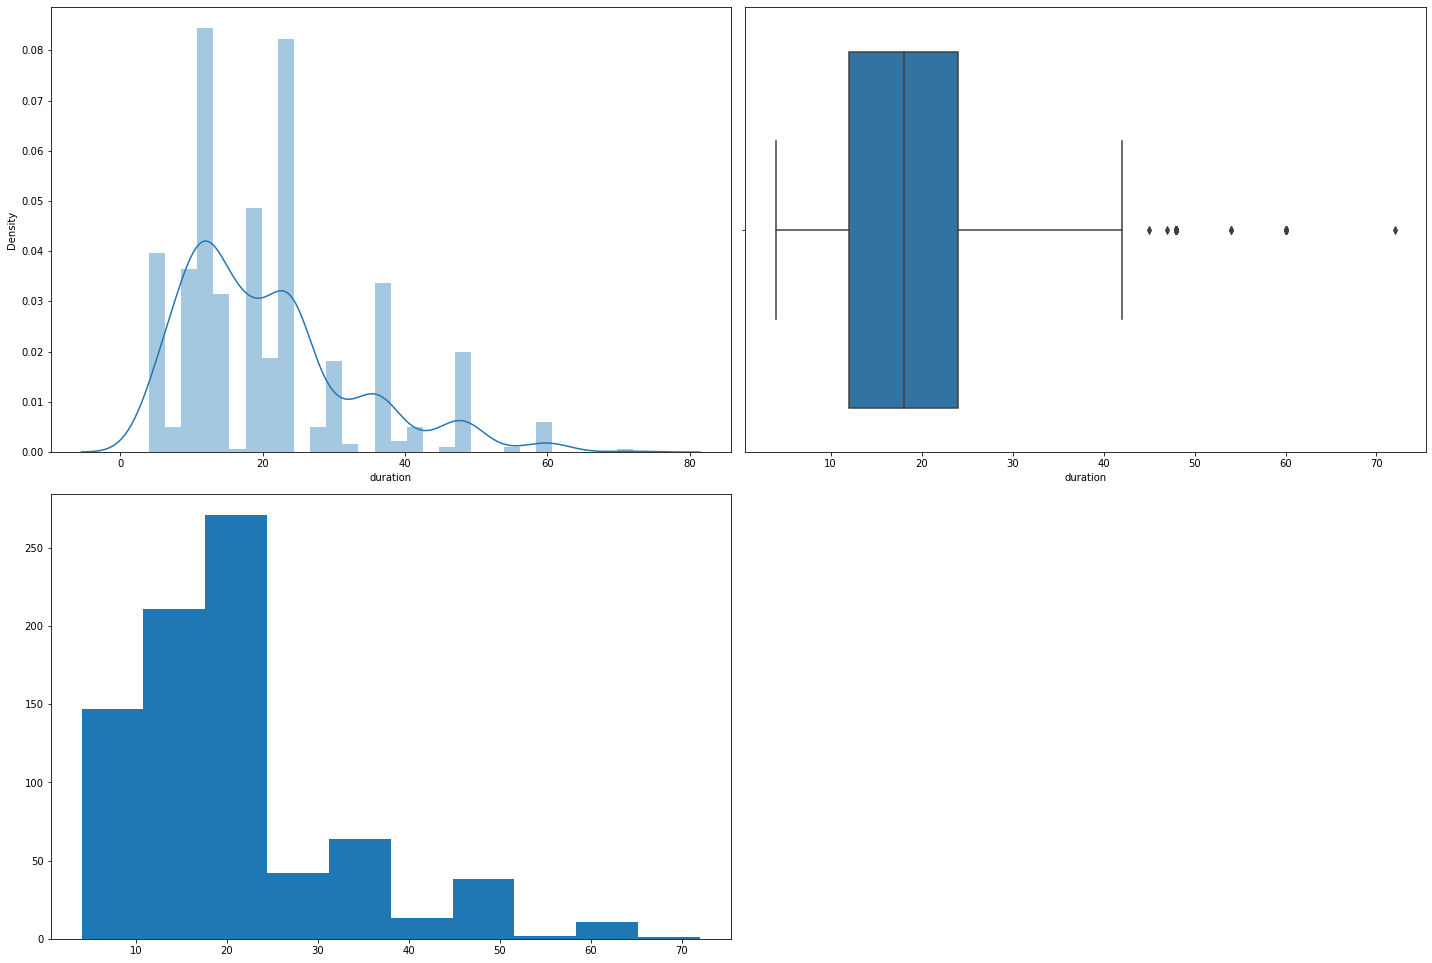

In [29]:
numdata(data["duration"]) # For Duration column

<AxesSubplot:>

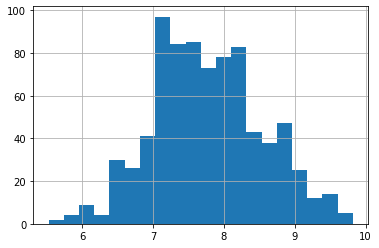

In [30]:
data['amount'] = np.log(data['amount'])

data['amount'].hist(bins=20) # Distribution After Log apply


## Applying log transformation to reduce the right side skewness.

<AxesSubplot:>

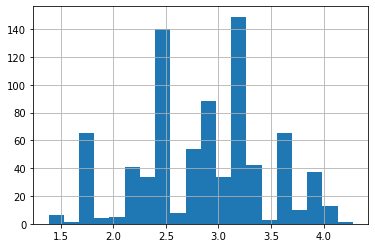

In [31]:
data['duration'] = np.log(data['duration'])

data['duration'].hist(bins=20)

## Applying log transformation to reduce the right side skewness.

<AxesSubplot:>

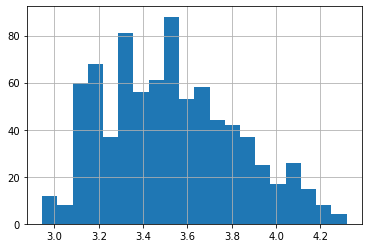

In [32]:
data['age'] = np.log(data['age'])

data['age'].hist(bins=20)

## Applying log transformation to reduce the right side skewness.

In [33]:
data.head()

# Read the Dataset After Preprocessing : Outlier and Missing value Treatment completed,
# Dataset Contain Categorical column which are in Discrete numbers 

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,2.890372,4,2,6.955593,1,2,4,2,1,4,2,3.044522,3,1,1,3,2,1,2,1
1,1,2.197225,4,0,7.937017,1,3,2,3,1,2,1,3.583519,3,1,2,3,1,1,2,1
2,2,2.484907,2,9,6.734592,2,4,2,2,1,4,1,3.135494,3,1,1,2,2,1,2,1
3,1,2.484907,4,0,7.660114,1,3,3,3,1,2,1,3.663562,3,1,2,2,1,1,1,1
4,1,2.302585,4,0,7.714677,1,2,1,3,1,3,1,3.871201,3,1,2,2,1,1,1,1


In [35]:
data.to_csv("C:\\Users\\Saransh Sehrawat\\My Projects\\Internship Credit Risk\\Training_Dataset\\Training_Batch_process.csv")

## Save the Clean Dataset for the Model training.